## Imports

In [36]:
import pandas as pd
import plotly.express as px
import os
from PIL import Image
import numpy as np 
from google.colab import drive # import de Google Drive (pour les images)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Chargement des images

In [38]:
def load_jpeg_images(path):
    image_files = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.jpeg')]
    images = []
    ids=[]
    for file in image_files:
        ids.append(os.path.splitext(file)[0])
        with Image.open(os.path.join(path, file)) as image:
            image_data = np.array(image)
            images.append(image_data)
    return pd.DataFrame({"ids":np.array(ids) , "img":np.array(images)})

df_images=load_jpeg_images("/content/drive/MyDrive/Projets Perso/Image Champi/images")

<ipython-input-38-b475ca0b709a>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return pd.DataFrame({"ids":np.array(ids) , "img":np.array(images)})


In [39]:
df_images.head(3)

,ids,img
0,681352,"[[[66, 75, 92], [52, 61, 76], [58, 67, 82], [6..."
1,690193,"[[[44, 37, 53], [41, 34, 50], [40, 34, 48], [4..."
2,66955,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."


## Répartition des dimensions des images

In [40]:
def get_dimensions(row):
    pixels = np.array(row['img'])
    hauteur, largeur, nb_canal = pixels.shape
    return pd.Series({'hauteur': hauteur, 'largeur': largeur})

# Application de la fonction à chaque ligne du dataframe
df_images[['hauteur', 'largeur']] = df_images.apply(get_dimensions, axis=1)

In [41]:
df_images.head(3)

,ids,img,hauteur,largeur
0,681352,"[[[66, 75, 92], [52, 61, 76], [58, 67, 82], [6...",240,320
1,690193,"[[[44, 37, 53], [41, 34, 50], [40, 34, 48], [4...",180,320
2,66955,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",240,320


In [42]:
num_distinct_dimensions = df_images[['hauteur', 'largeur']].drop_duplicates().shape[0]
print("Nombre de couples hauteur/largeur distincts :", num_distinct_dimensions)

Nombre de couples hauteur/largeur distincts : 311


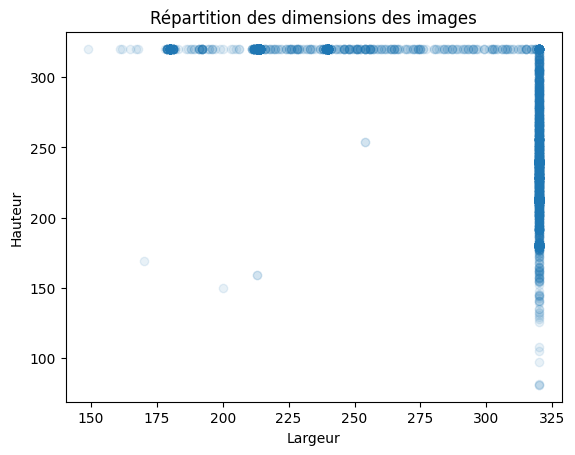

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df_images['largeur'], df_images['hauteur'], alpha=0.1)
plt.xlabel('Largeur')
plt.ylabel('Hauteur')
plt.title('Répartition des dimensions des images')
plt.show()

Le dataframe df_images contient un grand nombre d'images avec des dimensions différentes. En effet, il y a 311 dimensions différentes dans le dataframe, ce qui rend difficile la manipulation de ces images, notamment pour le Deep Learning.

Nous allons donc redimensionner toutes les images à la même dimension pour pouvoir les utiliser de manière optimale dans notre réseau de neurones.